In [2]:
!pip install tensorflow 

# **import dependencies**

In [3]:
!pip install numpy matplotlib

In [4]:
!pip install opencv-python

In [5]:
### import dependencies

import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## import tensorflow dependencies - functional api
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf




## **setting gpu growth**

In [ ]:
 ### gpu growth

 # avoid OOM errors by setting GPU memory consumption growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  
  tf.config.experimental.set_memory_growth(gpu,True)

## **folder structure for data**

In [8]:
### setup folder structure

#setup paths
pos_path = os.path.join('data','positive')
neg_path = os.path.join('data','negative')
anc_path = os.path.join('data','anchor')
 

In [11]:
##make dirs
os.makedirs(pos_path)
os.makedirs(neg_path)
os.makedirs(anc_path)

In [12]:
### untar labelled faces in the wild datasets
# http://vis-www.cs.umass.edu/lfw/

!tar -xf lfw.tgz

## **putting images together**

In [13]:
## moving lfw images to the data/negative

for directory in os.listdir('lfw'):
  for file in os.listdir(os.path.join('lfw',directory)):
    ex_path = os.path.join('lfw',directory,file)
    new_path = os.path.join('data/negative',file)
    os.replace(ex_path,new_path)

In [14]:
for file in os.listdir('data/negative'):
  print(file)

Aaron_Eckhart_0001.jpg
Aaron_Guiel_0001.jpg
Aaron_Patterson_0001.jpg
Aaron_Peirsol_0001.jpg
Aaron_Peirsol_0002.jpg
Aaron_Peirsol_0003.jpg
Aaron_Peirsol_0004.jpg
Aaron_Pena_0001.jpg
Aaron_Sorkin_0001.jpg
Aaron_Sorkin_0002.jpg
Aaron_Tippin_0001.jpg
Abbas_Kiarostami_0001.jpg
Abba_Eban_0001.jpg
Abdel_Aziz_Al-Hakim_0001.jpg
Abdel_Madi_Shabneh_0001.jpg
Abdel_Nasser_Assidi_0001.jpg
Abdel_Nasser_Assidi_0002.jpg
Abdoulaye_Wade_0001.jpg
Abdoulaye_Wade_0002.jpg
Abdoulaye_Wade_0003.jpg
Abdoulaye_Wade_0004.jpg
Abdulaziz_Kamilov_0001.jpg
Abdullah_0001.jpg
Abdullah_0002.jpg
Abdullah_0003.jpg
Abdullah_0004.jpg
Abdullah_Ahmad_Badawi_0001.jpg
Abdullah_al-Attiyah_0001.jpg
Abdullah_al-Attiyah_0002.jpg
Abdullah_al-Attiyah_0003.jpg
Abdullah_Gul_0001.jpg
Abdullah_Gul_0002.jpg
Abdullah_Gul_0003.jpg
Abdullah_Gul_0004.jpg
Abdullah_Gul_0005.jpg
Abdullah_Gul_0006.jpg
Abdullah_Gul_0007.jpg
Abdullah_Gul_0008.jpg
Abdullah_Gul_0009.jpg
Abdullah_Gul_0010.jpg
Abdullah_Gul_0011.jpg
Abdullah_Gul_0012.jpg
Abdullah_Gul_001

In [40]:
### import uuid library to generate unique image names
import uuid

## **Collect positive and anchor images**


In [41]:
# establish the connection to webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

while cap.isOpened():
  ret,frame = cap.read()
  frame = frame[50:300,250:500,:]
  
  ## collect anchors
  if cv2.waitKey(1) & 0XFF == ord('a'):
    #create unique name
    imgname= os.path.join(anc_path, '{}.jpg'.format(uuid.uuid1()))
    cv2.imwrite(imgname,frame) 
      
  
  ##collect positives
  if cv2.waitKey(1) & 0XFF == ord('p'):
    #create unique name
    imgname= os.path.join(pos_path, '{}.jpg'.format(uuid.uuid1()))
    cv2.imwrite(imgname,frame)
    
    
  # show image back to screen
  cv2.imshow("Image Collection", frame)

  #breaking gracefully
  if cv2.waitKey(1) & 0XFF == ord('q'):
    break

# release teh webcam
cap.release()

#close the image fram
cv2.destroyAllWindows()

Webcam opened successfully.


In [38]:
frame.shape

(250, 250, 3)

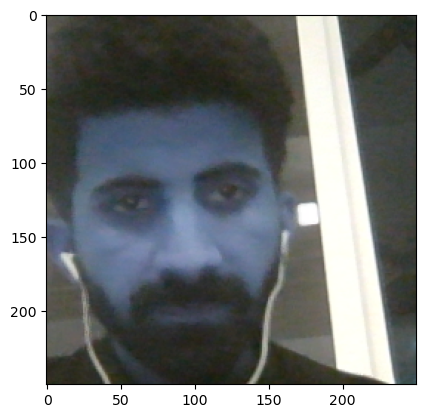

In [39]:
plt.imshow(frame) 

# **Load and preprocess Images**

### **Get image directotries**

In [9]:
anchor = tf.data.Dataset.list_files(anc_path+'\*.jpg').take(200)
positive = tf.data.Dataset.list_files(pos_path+'\*.jpg').take(200)
negative = tf.data.Dataset.list_files(neg_path+'\*.jpg').take(200)


In [10]:
dir_test = anchor.as_numpy_iterator()

In [11]:
dir_test.next()

b'data\\anchor\\7ae78db8-2366-11ef-baff-40b0344c035c.jpg'

## **Preprocessing - scaling and resizing**

In [16]:
def preprocess(file_path):
  
  ## rea in image from file path
  byte_img = tf.io.read_file(file_path)
  
  ## decode the byte image data
  img = tf.io.decode_jpeg(byte_img)
  #preprocess
  img = tf.image.resize(img, (100,100))
  #scaling the image etween 0 and 1 for better model performance
  img = img/255.0
  return img

In [13]:
img = preprocess('data\\anchor\\83357c9c-2366-11ef-ab57-40b0344c035c.jpg')

In [14]:
img.numpy().min()

0.04117647

In [15]:
print(img)

tf.Tensor(
[[[0.40392157 0.42181373 0.43357843]
  [0.39044118 0.42328432 0.43039215]
  [0.3732843  0.41838235 0.41936275]
  ...
  [0.18137255 0.22058824 0.18480392]
  [0.19436274 0.2254902  0.19044118]
  [0.18529412 0.21372549 0.17941177]]

 [[0.39338234 0.43259802 0.4365196 ]
  [0.38627452 0.42745098 0.43039215]
  [0.37083334 0.41495097 0.41495097]
  ...
  [0.19460784 0.21715686 0.1995098 ]
  [0.19975491 0.21789216 0.20245098]
  [0.20490196 0.22156863 0.20882353]]

 [[0.36960784 0.41666666 0.41666666]
  [0.36519608 0.4107843  0.41004902]
  [0.36519608 0.40490195 0.40122548]
  ...
  [0.21397059 0.2365196  0.2002451 ]
  [0.20465687 0.22205882 0.19632353]
  [0.21666667 0.22745098 0.20392157]]

 ...

 [[0.13014705 0.17230392 0.18014705]
  [0.12132353 0.16078432 0.17279412]
  [0.11617647 0.15563725 0.16617647]
  ...
  [0.08504902 0.14779411 0.14485294]
  [0.09117647 0.15465686 0.15392157]
  [0.075      0.12696078 0.13186274]]

 [[0.12034313 0.16544117 0.16740195]
  [0.11397059 0.15931372 0

## **Creating Labelled Dataset**

In [17]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0



In [18]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))

negatives = tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))

data = positives.concatenate(negatives)


In [19]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [26]:
classreps = tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

In [32]:

iter = classreps.as_numpy_iterator()

In [33]:
iter.next()

0.0

In [34]:
d = data.as_numpy_iterator()

In [38]:
example =d.next()

## **Build train and test partition**

In [37]:
def preprocess_twin(input_img, validation_img, label):
  return (preprocess(input_img), preprocess(validation_img), label)

In [39]:
preprocess_twin(*example)

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.3507353 , 0.389951  , 0.35539216],
         [0.3480392 , 0.39191177, 0.35906863],
         [0.33357844, 0.3767157 , 0.34534314],
         ...,
         [0.14509805, 0.21176471, 0.1889706 ],
         [0.1629902 , 0.2134804 , 0.19656862],
         [0.16446078, 0.20759805, 0.19191177]],
 
        [[0.3480392 , 0.38333333, 0.36568627],
         [0.33700982, 0.38039216, 0.36078432],
         [0.33578432, 0.37843138, 0.36544117],
         ...,
         [0.18186274, 0.22377451, 0.19901961],
         [0.16911764, 0.20367648, 0.18406862],
         [0.17279412, 0.20514706, 0.18651961]],
 
        [[0.3377451 , 0.37303922, 0.36715686],
         [0.33112746, 0.37230393, 0.36887255],
         [0.33431372, 0.37990198, 0.38014707],
         ...,
         [0.18210784, 0.2129902 , 0.19289216],
         [0.1992647 , 0.22279412, 0.20710784],
         [0.20122549, 0.22181372, 0.20612745]],
 
        ...,
 
        [[0.09632353, 0.1620098 

In [40]:
### dataloader pipeline

data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [41]:
d = data.as_numpy_iterator()


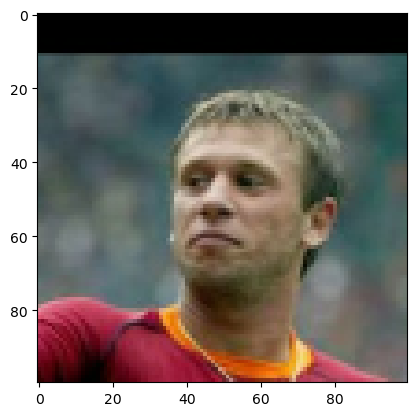

In [44]:
plt.imshow(d.next()[1])

In [46]:
d.next()[2]

0.0

In [47]:
### training partition

train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [52]:
### Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [53]:
t = test_data.as_numpy_iterator()

In [54]:
tt = t.next()

In [56]:
len(tt[0])

16